In [114]:
import numpy as np

## 2.1 scalars, vectors, matrices and tensors## 

scalars: a single number. often used in linear algebra to scale objects of higher dimension (vectors, etc.)

vectors: a 1-dim array of numbers. In many cases it is useful to think of vectors as identifiying arrows or points in n-dimensional space, where n is the number of elements in the vector

matrices: a 2-dim array of numbers. matrices are often used to describe linear transformations in n-dim space. 

tensors: an n-dim array, where n > 2.


### np vector ###
![title](img/lin1.png)

In [115]:
x = np.array([4,5,7])
x

array([4, 5, 7])

In [116]:
#indexing and shape
print('shape of x:', x.shape, end='\n\n')

print('x1...xn')
for i in range(len(x)): 
    print('x{}: {}   (arr idx {})'.format(i+1,x[i],i))

shape of x: (3,)

x1...xn
x1: 4   (arr idx 0)
x2: 5   (arr idx 1)
x3: 7   (arr idx 2)


### np matrix (A)###
![lin2](img/lin2.png)

In [117]:
A = np.array([[1,2],
              [3,4]])
A

array([[1, 2],
       [3, 4]])

In [118]:
#indexing and shape
print('shape of A:', A.shape, end='\n\n')

print('x[1,1]...A[2,2]')
for i in range(len(A)):
    for j in range(len(A[i])):
        print('x{},{}: {}   (arr idx {},{})'.format(i+1,j+1,A[i,j],i,j))

shape of A: (2, 2)

x[1,1]...A[2,2]
x1,1: 1   (arr idx 0,0)
x1,2: 2   (arr idx 0,1)
x2,1: 3   (arr idx 1,0)
x2,2: 4   (arr idx 1,1)


![lin3](img/lin3.png)

In [119]:
A_t = np.transpose(A)
A_t

array([[1, 3],
       [2, 4]])

In [120]:
#3x3 transpose 
A3 = np.array([[1,2,3],
               [4,5,6],
               [7,8,8]])
A3

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 8]])

In [121]:
np.transpose(A3)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 8]])

![lin4](img/lin4.png)

In [122]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[2,2],
              [2,2]])
C = A + B
C

array([[3, 4],
       [5, 6]])

![lin5](img/lin5.png)

In [123]:
a,c = 10,5
B = np.array([[0,1],
              [2,3]])
#   10*B + 5
D = a*B + c
D

array([[ 5, 15],
       [25, 35]])

## 2.2 Multiplying Matrices and Vectors## 

![lin6](img/lin6.png)
<p>I like to think of eq. 2.5 as defining the element at c[i,j] as the vector dot product <br>between the ith row of A and jth col of B</p>

In [124]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[1,3],
              [2,4]])

#the np dot method performs matrix multiplication in the form defined in eq. 2.5 when A and B are matrices (dim == 2d)
#this is not to be confused with the vector dot product mentioned below eq. 2.5
C = A.dot(B)
C

array([[ 5, 11],
       [11, 25]])

![lin7](img/lin7.png)
## Systems of linear equations are frequently quoted as a set of n equations with n unknowns
<br>
<p size="4">In this context, 'A' will be a n x n matrix where each row can be interpretted as the set of coefficents for one of the n equations<br><br>x will be a vector of the n unknowns and b will be the vector of right hand constants equal to each of the n equations<br></p>

### Let's see how this works in a concrete example:

<p size="4"><br>suppose we'd like to find a solution to the following system of equations</font>
<p size="5"><br><br>$$ 2s + 5t = 19 $$<br>$$ 3s - 7t = -15 $$</p>
<p size="4"><br>We could then represent this system in the following form:</p>

In [125]:
'''
A = [[2, 5],
     [3,-7]]

x = [s,
     t]

b = [19,
    -15]
    
Ax = b
''';

### Our goal is then to find the vector x, such that the matrix-vector product Ax = b
<br>
We could approach this using elimination of substitution methods but this quickly gets out of hand for bigger systems. Instead we will look to a more powerful method known as <b>Matrix Inversion</b>


<br><br>
## 2.3 Identity and Inverse Matrices
![lin8](img/lin8.png)

In [126]:
#identity matrix
I = np.array([[1,0],
              [0,1]])

#suppose x = [1,2]
x = np.array([1,2])

#Let's confirm Ix = x
Ix = I.dot(x)
print(x)
print(Ix)
print('Ix == x:', np.array_equal(Ix,x))

[1 2]
[1 2]
Ix == x: True


## Because Ix = x, we can find the vector x with the following equation
![lin9](img/lin9.png)

## 2.4 Linear Dependence and Span
![lin10](img/lin10.png)

### I like to decompose the the necessary conditions for A-1 to exist into two parts:
1. There must be a solution vector 'x' for all values of b
2. There must be exactly one solution 'x' for each value of b

## Condition 1

### In order to satisfy condition 1, it must be true that product of Ax can reach any vector b
### For this to be true, it must be true that a linear combination of the columns of A can reach any point in n-dim space where n is number of components in b

### If we have a set of vectors v1,v2..,vn , and scalars a1,a2..,an , a linear combination is just a summation of each vector v scaled by a. Something like this...
![lin11](img/lin11.png)

## The book outlines this more formally in the context of the system of equations Ax = b
### Here the set of vectors v are the columns of A and the scalars a are the components of x
![lin12](img/lin12.png)

![lin13](img/lin13.png)
# We can extend this to condition 1, by saying the span or column space of A must reach all possible vectors of b

In other words..
![lin14](img/lin14.png)
## Additionally to satisfy condition 1, we must also confirm that each column of A is linearly independent from every other column of A

### Linear dependence is detailed in the next markdown cell

In [127]:
"""
Returning to the system of equations example
we have..

2s + 5t = 19
3s - 7t = -15

A = [[2, 5],
     [3,-7]]

b = [19,
    -15]

x = [s,
     t]
     
To satisfy condition 1, it must be that the column space of A reaches all possible b

To confirm this we need to verify A has 2 rows (len(b)) 
and the cols of A ([2,3] and [5,-7]) are 'linearly independent'
1. 2 rows
2. [2,3] and [5,-7] are linearly independent

So, A satisfies condition 1
"""

array([[1, 2],
       [3, 4]])

## Condition 2
### To satisfy condition 2, There must be exactly one vector x solution to Ax = b for each b
### Said differently, There must be exactly one linear combination of the colums of A wich equals b 
## Otherwise there are multiple input vectors x which yeild the same output vector b
![lin15](img/lin15.png)

In [137]:
'''
Returning to the system of equations example

2s + 5t = 19
3s - 7t = -15

A = [[2, 5],
     [3,-7]]

b = [19,
    -15]

x = [s,
     t]
     
We've already satisfied condition 1
A is clearly square so conditon 2 is satisfied as well

With this, we can safely employ any of the algorithms commonly used to find a closed form solution.

'''
a = np.array([[2,5], 
              [3,-7]])
b = np.array([19,-15])
x = np.linalg.solve(a, b)
x

array([2., 3.])

## 2.5 Norms
![lin16](img/lin16.png)

In [143]:
x = np.array([3,2,7,-4,8])
p = 4

#L4 norm of x
norm = np.sum(np.absolute(x) ** p) ** (1/p)
norm

9.097512120697298

![lin17](img/lin17.png)

In [147]:
x = np.array([3,2,7,-4,8])
p = 2

#Euclidean (L2) norm of x
norm = np.sum(np.absolute(x) ** p) ** (1/p)
print('L2:',norm)

#L2^2 norm of x
norm2 = np.sum(np.absolute(x) ** p)
print('L2^2:',norm2)

#L2^2 calculated as xTx
norm2 = x.dot(x)
print('L2^2:',norm2,'(xTx)')

L2: 11.916375287812984
L2^2: 142
L2^2: 142 (xTx)


![lin18](img/lin18.png)

In [149]:
x = np.array([3,2,7,-4,8])

#max norm of x
norm = x.max()
print('L_infinity:',norm)

L_infinity: 8


![lin19](img/lin19.png)

In [150]:
A = np.array([[3,2],
              [7,-4]])


#Frobenius norm of A
norm = np.sum(A**2)**.5
print('A_F:',norm)

A_F: 8.831760866327848


## 2.6 Special kinds of matrices and vectors
![lin20](img/lin20.png)

## Before devling into the next sections which details two important matrix decompostions (eigendecomposition and SVD), I think it will be useful to first mention two other important factorizations 

# 1. A = LU 
# 2. A = QR

### Lets start with LU Factorization


In [1]:
###

## 2.7 Eigendecomposition
![lin21](img/lin21.png)

In [154]:
#Suppose we have some matrix A
A = np.array([[2,3],
              [2,1]])

#If we can find some vector (v) and scalar (lmbda) such that A v = lmbda v
#then v is an eigenvector of A and lmbda is an eigenvalue
#In other words v is simply scaled by lmbda when multiplied by A

#one eigenvector or A
v = np.array([3,2])

#corresponding eigenvalue
lmbda = 4

#Let's confirm A v = lmbda v
print('Av:     ',A.dot(v))
print('lmbda_v:',lmbda * v)

Av:      [12  8]
lmbda_v: [12  8]


![lin22](img/lin22.png)

![lin23](img/lin23.png)

In [197]:
#Suppose again we have matrix A
A = np.array([[2,3],
              [2,1]])

#A has two 2 sets of eigenvectors and eigenvalues, v1,lmbda1 and v2,lmbda2
v1 = np.array([3,2])
lmbda1 = 4

v2 = np.array([-1,1])
lmbda2 = -1

#V = [v1,v2] col concatenation
V = np.column_stack((v1,v2))

#V-1
V_inv = np.linalg.inv(V)

#l = [lmbda1,lmbda2]
l = np.array([lmbda1,lmbda2])

#diag(l)
diag = np.diag(l)

#I'd like to spend some time confirming Eq 2.40 analytically or via proof
#For now lets confirm the equation holds computationally using numpy

V_diag_Vinv = V.dot(diag).dot(V_inv).astype(int)

print('A == Vdiag(l)V_inv ?', np.array_equal(A,V_diag_Vinv))

V_diag_Vinv

A == Vdiag(l)V_inv ? True


array([[2, 3],
       [2, 1]])

## 2.8 Single Value Decomposition
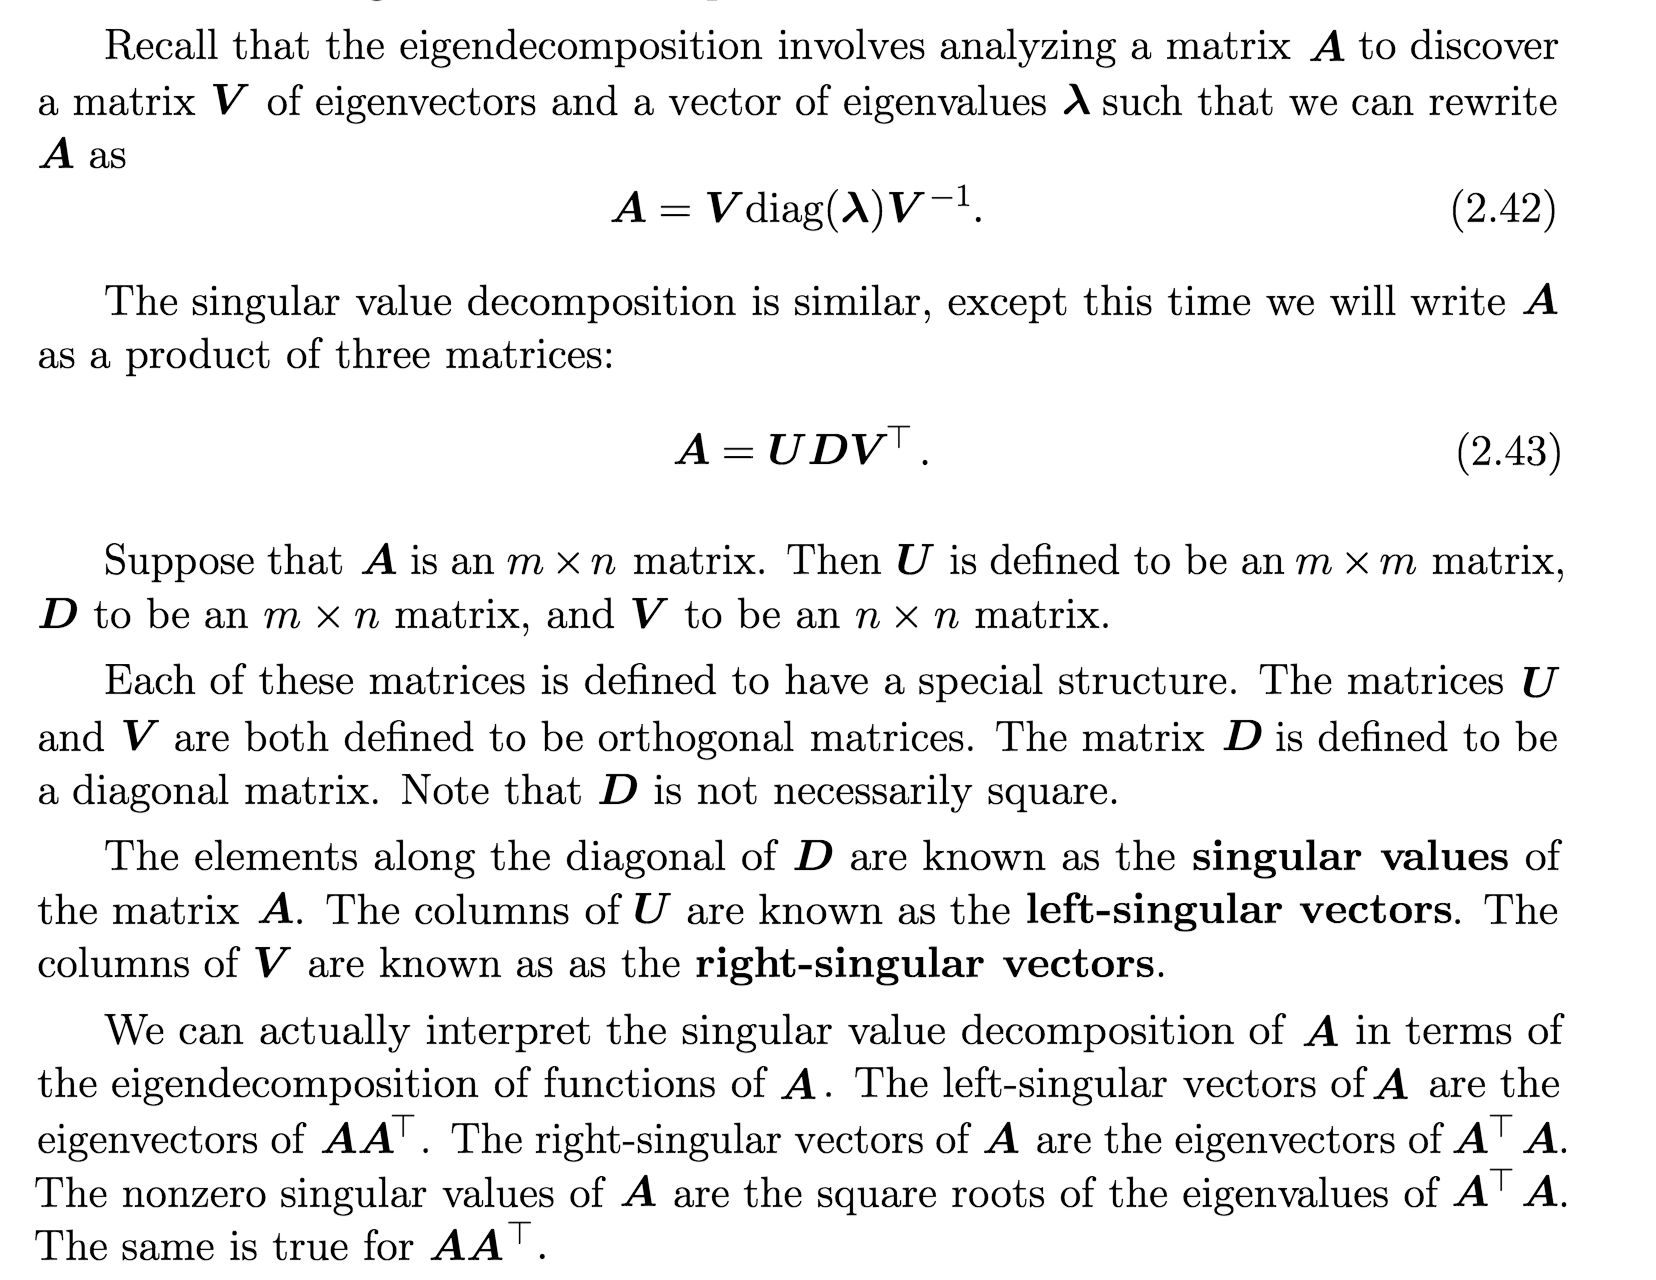

In [ ]:
#Suppose A is now a 2x3 (mxn) matrix
A = np.array([[3,2,2],
              [2,3,-2]])

# We'd like to find the singular value decomposition of A: UDV_t
# we know D is a diagonal matrix and U and V_t are both orthogonal matrices
# graphically this means the matrices U and V_t are rotations and D simply scales the basis vectors i,j,k..
